## Chhery Chorn 6520310203

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
np.sum(df['Churn'] == 'Yes'), np.sum(df['Churn'] == 'No')

(np.int64(1869), np.int64(5174))

In [14]:
(df['Churn'] == 'Yes').mean(), (df['Churn'] == 'No').mean()

(np.float64(0.2653698707936959), np.float64(0.7346301292063041))

In [15]:
# Count and percentage of Churn
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

# Combine into a DataFrame for nice display
churn_dist = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_percentages.round(1)
})

print("การกระจายของตัวแปรเป้าหมาย (Churn):")
print(churn_dist)

การกระจายของตัวแปรเป้าหมาย (Churn):
       Count  Percentage
Churn                   
No      5174        73.5
Yes     1869        26.5


In [16]:
# Count and percentage of Contract
contract_counts = df['Contract'].value_counts()
contract_percentages = df['Contract'].value_counts(normalize=True) * 100

# Combine into a DataFrame
contract_dist = pd.DataFrame({
    'Count': contract_counts,
    'Percentage': contract_percentages.round(1)
})

print("\nการกระจายของประเภทสัญญา (Contract):")
print(contract_dist)


การกระจายของประเภทสัญญา (Contract):
                Count  Percentage
Contract                         
Month-to-month   3875        55.0
Two year         1695        24.1
One year         1473        20.9


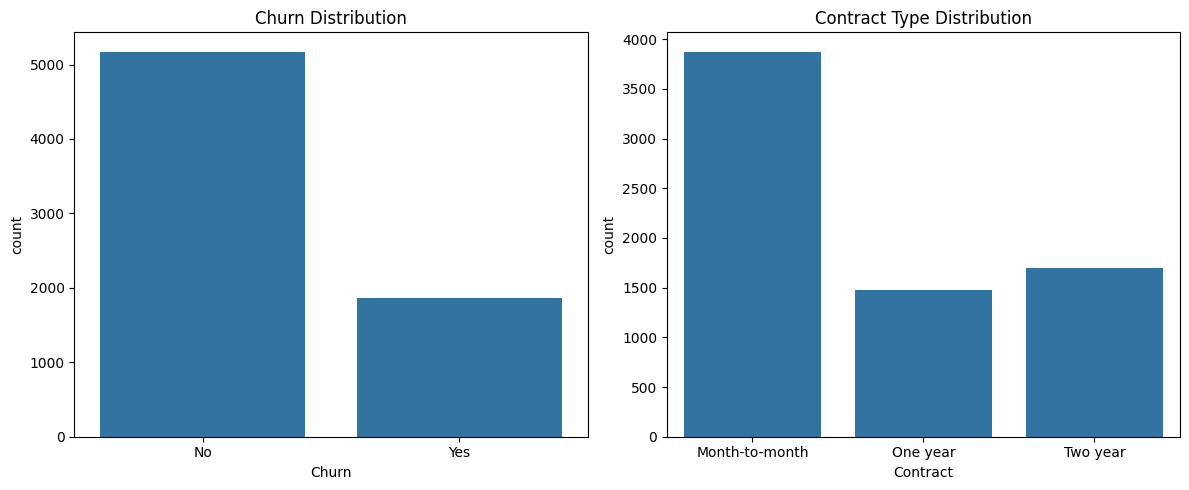

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='Churn', ax=ax[0])
ax[0].set_title('Churn Distribution')

sns.countplot(data=df, x='Contract', ax=ax[1])
ax[1].set_title('Contract Type Distribution')

plt.tight_layout()
plt.show()

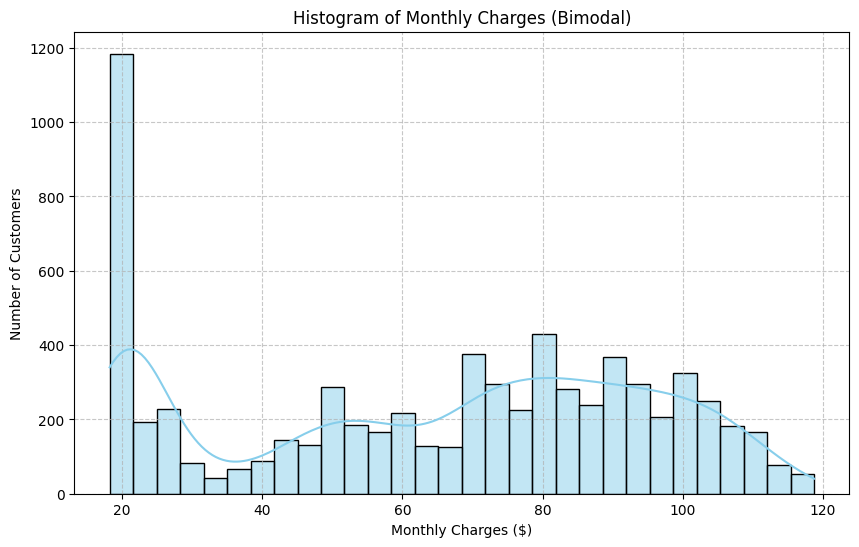

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Monthly Charges (Bimodal)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10252\1476730041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')


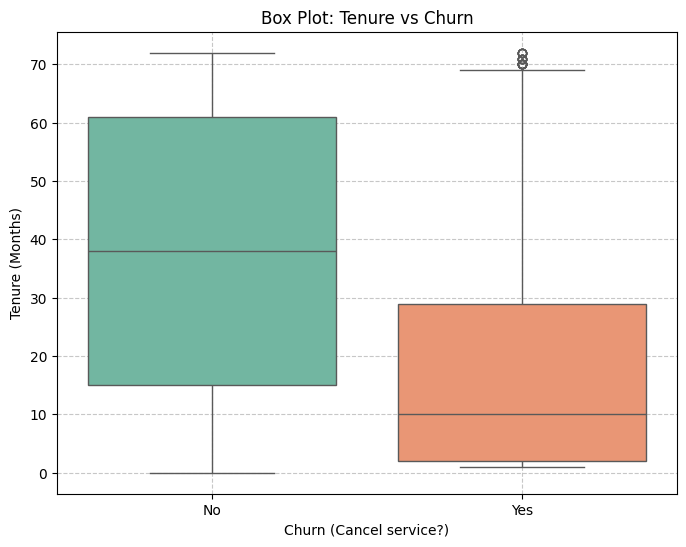

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title('Box Plot: Tenure vs Churn')
plt.xlabel('Churn (Cancel service?)')
plt.ylabel('Tenure (Months)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
avg_tenure = df.groupby('Churn')['tenure'].mean().round(1)
print("ค่าเฉลี่ยของ tenure แยกตาม Churn:")
for churn_status, avg in avg_tenure.items():
    print(f"ลูกค้าที่{'ยกเลิก' if churn_status == 'Yes' else 'ไม่ยกเลิก'}บริการ: {avg} เดือน")

ค่าเฉลี่ยของ tenure แยกตาม Churn:
ลูกค้าที่ไม่ยกเลิกบริการ: 37.6 เดือน
ลูกค้าที่ยกเลิกบริการ: 18.0 เดือน
